In [4]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn
import numpy as np

In [3]:
## combine all results together，and get the final file 'final_results.csv', run once and then you can directly read 'final_results.csv'

# # Bilstm-partial-crf result 
# bilstm_partial_file='data/bilstm-partial-crf.csv'
# bilstm_data=pd.read_csv(bilstm_partial_file)
# bilstm_data.rename(columns={'removal_method':'entity_removal_method','removal_rate':'entity_removal_rate'},inplace=True)
# bilstm_data['number_of_surfaceforms']=0 # 初始化
# bilstm_data.loc[bilstm_data['entity_name']=='Disease','number_of_surfaceforms']=4238
# bilstm_data.loc[bilstm_data['entity_name']=='CellLine','number_of_surfaceforms']=1419
# bilstm_data.loc[bilstm_data['entity_name']=='Species','number_of_surfaceforms']=1567
# bilstm_data.loc[bilstm_data['entity_name']=='Chemical','number_of_surfaceforms']=29908
# bilstm_data.loc[bilstm_data['entity_name']=='Gene','number_of_surfaceforms']=28109
# bilstm_data['number_of_entity_annotations_after_removal']=bilstm_data['number_of_annotations']-bilstm_data['number_of_removal_annotations'] 
# bilstm_data['number_of_surfaceforms_after_removal']=bilstm_data['number_of_surfaceforms']-bilstm_data['number_of_removal_surfaceforms'] 

# bilstm_data=bilstm_data[bilstm_data['entity_removal_rate']!=0.0][['entity_name','entity_removal_method', 'entity_removal_rate','number_of_annotations','number_of_surfaceforms','number_of_entity_annotations_after_removal','number_of_surfaceforms_after_removal','test_precision','test_recall','test_f1','seed']]
# bilstm_data['Model']='BiLSTM-Partial-CRF' # 新增列model

# # pubemedbert-partial result
# file_name=r'data/pubmedbert-partial.csv'
# pubmedbert_data=pd.read_csv(file_name)
# pubmedbert_data['number_of_surfaceforms']=0 # 初始化
# pubmedbert_data.loc[pubmedbert_data['entity_name']=='Disease','number_of_surfaceforms']=4238
# pubmedbert_data.loc[pubmedbert_data['entity_name']=='CellLine','number_of_surfaceforms']=1419
# pubmedbert_data.loc[pubmedbert_data['entity_name']=='Species','number_of_surfaceforms']=1567
# pubmedbert_data.loc[pubmedbert_data['entity_name']=='Chemical','number_of_surfaceforms']=29908
# pubmedbert_data.loc[pubmedbert_data['entity_name']=='Gene','number_of_surfaceforms']=28109
# pubmedbert_data['number_of_entity_annotations_after_removal']=pubmedbert_data['number_of_annotations']-pubmedbert_data['number_of_removal_annotations'] 
# pubmedbert_data['number_of_surfaceforms_after_removal']=pubmedbert_data['number_of_surfaceforms']-pubmedbert_data['number_of_removal_surfaceforms'] 
# pubmedbert_data=pubmedbert_data[['entity_name','entity_removal_method', 'entity_removal_rate','number_of_annotations','number_of_surfaceforms','number_of_entity_annotations_after_removal','number_of_surfaceforms_after_removal','test_precision','test_recall','test_f1','seed']]
# pubmedbert_data['Model']='PubMedBERT'


# # partial-eer
# file_name=r'data/partial-eer.csv'
# eer_data=pd.read_csv(file_name)
# # 用到的列：test/test_recall-measure-overall,dataset_reader.removal_algorithm, train_data_path,dataset_reader.removal_rate,要进行统一
# eer_data['train_data_path']=eer_data['train_data_path'].str.split('/').str.get(1)
# eer_data.rename(columns={'train_data_path':'entity_name','dataset_reader.removal_algorithm':'entity_removal_method','dataset_reader.removal_rate':'entity_removal_rate',"test/test_recall-overall":"test_recall","test/test_precision-overall":"test_precision","test/test_f1-measure-overall":"test_f1","random_seed":"seed"},inplace=True)
# eer_data=eer_data[['entity_name','entity_removal_method', 'entity_removal_rate','test_precision','test_recall','test_f1',"seed"]]
# eer_data['Model']='EER-PubMedBERT'


# # My model result
# file_name=r'data/gene_chemical_cellline_species.csv'
# mymodel_data1=pd.read_csv(file_name)
# file_name=r'data/disease_7.csv'
# mymodel_data2=pd.read_csv(file_name)
# mymodel_data=pd.concat([mymodel_data1,mymodel_data2],axis=0)
# mymodel_data=mymodel_data[['entity_name','entity_removal_method', 'entity_removal_rate','test_precision','test_recall','test_f1','seed']]
# mymodel_data['Model']='TS-PubMedBERT-Partial-CRF'

# # Bilstm-partial-crf  and pubemedbert-partial result combination
# all_baselines=pd.concat([bilstm_data,pubmedbert_data,eer_data,mymodel_data],ignore_index=True)
# all_baselines.loc[all_baselines[all_baselines['entity_removal_method']=='remove_annotation_ranomly'].index,'entity_removal_method']='remove_annotations_randomly' # 把remove_annotation_ranomly更改为remove_annotations_randomly


# all_baselines.to_csv('data/final_results.csv',index=False)

In [ ]:
%matplotlib inline

In [13]:
all_baselines=pd.read_csv(r'data/final_results.csv')

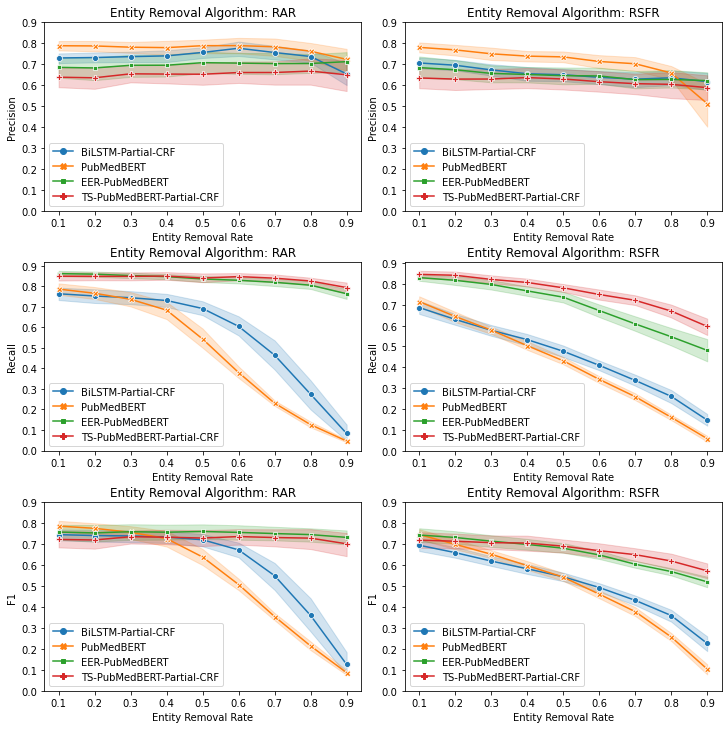

In [16]:
# 创建一幅图，集合所有的数据集，一共包含6个子图，
entity_removal_algorithm_list=['remove_annotations_randomly','remove_surfaceforms_randomly']
removal_algorithm_map={"remove_surfaceforms_randomly":'RSFR',"remove_annotations_randomly":"RAR"}
metrics=['test_precision','test_recall','test_f1']
metrics_removal_algorithm=[[alg,metric] for metric in metrics for alg in entity_removal_algorithm_list]
def plot_figure_aggragate_entity_name(metrics_removal_algorithm,ax,dataframe):
    seaborn.lineplot(data=dataframe[(dataframe['entity_removal_method']==metrics_removal_algorithm[0])],style="Model",markers=True,dashes=False,x='entity_removal_rate',y=metrics_removal_algorithm[1],hue='Model',err_style='band',ax=ax,hue_order=all_baselines['Model'].unique())
    abbr_algorithm=removal_algorithm_map[metrics_removal_algorithm[0]]

    ax.legend(loc='lower left')
    ax.set_xlabel('Entity Removal Rate')
    ax.set_ylabel(metrics_removal_algorithm[1].replace('test_','').capitalize())
    ax.set_yticks(np.arange(0,1.0,0.1))
    ax.set_title(f'Entity Removal Algorithm: {abbr_algorithm}')

fig,axs=plt.subplots(3,2,figsize=(10,10),constrained_layout=True)
for ax,combi in zip(axs.flat,metrics_removal_algorithm):
    plot_figure_aggragate_entity_name(combi,ax,all_baselines)

plt.savefig(f"figures/aggragate_dataset_subplot.pdf",dpi=1000)
plt.show()

In [5]:
all_baselines.head()

,entity_name,entity_removal_method,entity_removal_rate,number_of_annotations,number_of_surfaceforms,number_of_entity_annotations_after_removal,number_of_surfaceforms_after_removal,test_precision,test_recall,test_f1,seed,Model
0,Gene,remove_annotations_randomly,0.1,82803.0,28109.0,74523.0,23111.0,0.694386,0.774218,0.732132,42,BiLSTM-Partial-CRF
1,Gene,remove_annotations_randomly,0.1,82803.0,28109.0,74523.0,23031.0,0.697964,0.767470,0.731069,42,BiLSTM-Partial-CRF
2,Gene,remove_annotations_randomly,0.1,82803.0,28109.0,74523.0,23158.0,0.697089,0.764403,0.729196,42,BiLSTM-Partial-CRF
3,Gene,remove_annotations_randomly,0.1,82803.0,28109.0,74523.0,23062.0,0.691741,0.775185,0.731090,42,BiLSTM-Partial-CRF
4,Gene,remove_annotations_randomly,0.1,82803.0,28109.0,74523.0,23026.0,0.701582,0.767046,0.732855,42,BiLSTM-Partial-CRF


In [33]:
all_baselines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   entity_name                                 1800 non-null   object 
 1   entity_removal_method                       1800 non-null   object 
 2   entity_removal_rate                         1800 non-null   float64
 3   number_of_annotations                       900 non-null    float64
 4   number_of_surfaceforms                      900 non-null    float64
 5   number_of_entity_annotations_after_removal  900 non-null    float64
 6   number_of_surfaceforms_after_removal        900 non-null    float64
 7   test_precision                              1800 non-null   float64
 8   test_recall                                 1800 non-null   float64
 9   test_f1                                     1800 non-null   float64
 10  seed        

In [6]:
all_baselines.shape

(1800, 12)

In [7]:
all_baselines.columns   

Index(['entity_name', 'entity_removal_method', 'entity_removal_rate',
       'number_of_annotations', 'number_of_surfaceforms',
       'number_of_entity_annotations_after_removal',
       'number_of_surfaceforms_after_removal', 'test_precision', 'test_recall',
       'test_f1', 'seed', 'Model'],
      dtype='object')

In [17]:
all_baselines=all_baselines[['entity_name', 'entity_removal_method', 'entity_removal_rate','test_precision', 'test_recall',
       'test_f1','Model']]

In [18]:
# 格式操作
all_baselines.rename(columns={'entity_name':'Dataset','entity_removal_rate':'Rate','entity_removal_method':'Scheme'},inplace=True)
all_baselines.replace('remove_annotations_randomly','RAR',inplace=True)
all_baselines.replace('remove_surfaceforms_randomly','RSFR',inplace=True)

In [19]:
upperbond=pd.read_csv('data/pubmedbert-upperbond.csv')[['entity_name','test_f1','test_precision', 'test_recall']]

In [20]:
upperbond

,entity_name,test_f1,test_precision,test_recall
0,Gene,0.776231,0.751694,0.802423
1,Chemical,0.879305,0.865692,0.893353
2,Disease,0.851693,0.843068,0.860496
3,CellLine,0.709802,0.685629,0.735743
4,Species,0.772553,0.772822,0.772284


In [12]:
upperbond.describe()

,test_f1,test_precision,test_recall
count,5.000000,5.000000,5.000000
mean,0.797917,0.783781,0.812860
std,0.067812,0.072471,0.064130
min,0.709802,0.685629,0.735743
25%,0.772553,0.751694,0.772284
50%,0.776231,0.772822,0.802423
75%,0.851693,0.843068,0.860496
max,0.879305,0.865692,0.893353


# Main Results Analysis

In [21]:
all_baselines.columns

Index(['Dataset', 'Scheme', 'Rate', 'test_precision', 'test_recall', 'test_f1',
       'Model'],
      dtype='object')

In [61]:
main_result=all_baselines.groupby(by=['Dataset','Scheme','Rate','Model']).agg(["mean",lambda x:1.96*x.sem()])[['test_f1','test_precision','test_recall']]
main_result.columns=['mean_f1','ci95_f1','mean_precision','ci95_precision','mean_recall','ci95_recall']
# 使用format的方式会保留最后一位0
main_result['P']=main_result['mean_precision'].map(lambda x: '%.2f'%(x*100))+"±"+main_result['ci95_precision'].map(lambda x: '%.2f'%(x*100))
main_result['R']=main_result['mean_recall'].map(lambda x: '%.2f'%(x*100))+"±"+main_result['ci95_recall'].map(lambda x: '%.2f'%(x*100))
main_result['F1']=main_result['mean_f1'].map(lambda x: '%.2f'%(x*100))+"±"+main_result['ci95_f1'].map(lambda x: '%.2f'%(x*100))


In [23]:
main_result.reset_index(inplace=True)

In [62]:
main_result

mean_f1   ci95_f1  \
Dataset  Scheme Rate Model                                           
CellLine RAR    0.1  BiLSTM-Partial-CRF         0.640810  0.011196   
                     EER-PubMedBERT             0.633198  0.011718   
                     PubMedBERT                 0.691471  0.008449   
                     TS-PubMedBERT-Partial-CRF  0.601308  0.082100   
                0.2  BiLSTM-Partial-CRF         0.623558  0.008709   
...                                                  ...       ...   
Species  RSFR   0.8  TS-PubMedBERT-Partial-CRF  0.631978  0.021929   
                0.9  BiLSTM-Partial-CRF         0.215233  0.037108   
                     EER-PubMedBERT             0.542366  0.015184   
                     PubMedBERT                 0.150917  0.034424   
                     TS-PubMedBERT-Partial-CRF  0.568790  0.035286   

                                                mean_precision  \
Dataset  Scheme Rate Model                                       
CellLine RAR    0.1  BiLSTM-Partial-CRF               0.642169   
                     EER-PubMedBERT                   0.515502   
                     PubMedBERT                       0.710566   
                     TS-PubMedBERT-Partial-CRF        0.493073   
                0.2  BiLSTM-Partial-CRF               0.631491   
...                                                        ...   
Species  RSFR   0.8  TS-PubMedBERT-Partial-CRF        0.576696   
                0.9  BiLSTM-Partial-CRF               0.686752   
                     EER-PubMedBERT                   0.492840   
                     PubMedBERT                       0.610310   
                     TS-PubMedBERT-Partial-CRF        0.505756   

                                                ci95_precision  mean_recall  \
Dataset  Scheme Rate Model                                                    
CellLine RAR    0.1  BiLSTM-Partial-CRF               0.011780     0.639744   
                     EER-PubMedBERT                   0.014439     0.820884   
                     PubMedBERT                       0.012258     0.673896   
                     TS-PubMedBERT-Partial-CRF        0.109966     0.805622   
                0.2  BiLSTM-Partial-CRF               0.015223     0.616506   
...                                                        ...          ...   
Species  RSFR   0.8  TS-PubMedBERT-Partial-CRF        0.040478     0.716435   
                0.9  BiLSTM-Partial-CRF               0.047832     0.128814   
                     EER-PubMedBERT                   0.034449     0.605989   
                     PubMedBERT                       0.048404     0.087256   
                     TS-PubMedBERT-Partial-CRF        0.058504     0.658148   

                                                ci95_recall            P  \
Dataset  Scheme Rate Model                                                 
CellLine RAR    0.1  BiLSTM-Partial-CRF            0.016992   64.22±1.18   
                     EER-PubMedBERT                0.005052   51.55±1.44   
                     PubMedBERT                    0.018487   71.06±1.23   
                     TS-PubMedBERT-Partial-CRF     0.036356  49.31±11.00   
                0.2  BiLSTM-Partial-CRF            0.018184   63.15±1.52   
...                                                     ...          ...   
Species  RSFR   0.8  TS-PubMedBERT-Partial-CRF     0.095647   57.67±4.05   
                0.9  BiLSTM-Partial-CRF            0.027025   68.68±4.78   
                     EER-PubMedBERT                0.016648   49.28±3.44   
                     PubMedBERT                    0.024281   61.03±4.84   
                     TS-PubMedBERT-Partial-CRF     0.041798   50.58±5.85   

                                                         R          F1  
Dataset  Scheme Rate Model                                              
CellLine RAR    0.1  BiLSTM-Partial-CRF         63.97±1.70  64.08±1.12  
                     EER-PubMedBERT        

In [25]:
main_result[['Dataset', 'Scheme', 'Rate', 'Model','P','R','F1']].to_latex('results/main_all_result.tex',longtable=True,index=False,bold_rows=False,multirow=True,caption='Results averaged over all random seeds')


/var/folders/wk/h6b75djs4kj7t3wc4yxz9llm0000gn/T/ipykernel_31267/2922251498.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  main_result[['Dataset', 'Scheme', 'Rate', 'Model','P','R','F1']].to_latex('results/main_all_result.tex',longtable=True,index=False,bold_rows=False,multirow=True,caption='Results averaged over all random seeds')


In [26]:
main_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dataset         360 non-null    object 
 1   Scheme          360 non-null    object 
 2   Rate            360 non-null    float64
 3   Model           360 non-null    object 
 4   mean_f1         360 non-null    float64
 5   ci95_f1         360 non-null    float64
 6   mean_precision  360 non-null    float64
 7   ci95_precision  360 non-null    float64
 8   mean_recall     360 non-null    float64
 9   ci95_recall     360 non-null    float64
 10  P               360 non-null    object 
 11  R               360 non-null    object 
 12  F1              360 non-null    object 
dtypes: float64(7), object(6)
memory usage: 36.7+ KB


In [48]:
all_baselines.columns

Index(['Dataset', 'Scheme', 'Rate', 'test_precision', 'test_recall', 'test_f1',
       'Model'],
      dtype='object')

In [49]:
average_rate_dataset=all_baselines.groupby(['Scheme','Model','Rate']).agg(["mean",lambda x:1.96*x.sem()])[['test_f1','test_precision','test_recall']]
average_rate_dataset.columns=['mean_f1','ci95_f1','mean_precision','ci95_precision','mean_recall','ci95_recall']
average_rate_dataset['P']=average_rate_dataset['mean_precision'].map(lambda x: '%.2f'%(x*100))+"±"+average_rate_dataset['ci95_precision'].map(lambda x: '%.2f'%(x*100))
average_rate_dataset['R']=average_rate_dataset['mean_recall'].map(lambda x: '%.2f'%(x*100))+"±"+average_rate_dataset['ci95_recall'].map(lambda x: '%.2f'%(x*100))
average_rate_dataset['F1']=average_rate_dataset['mean_f1'].map(lambda x: '%.2f'%(x*100))+"±"+average_rate_dataset['ci95_f1'].map(lambda x: '%.2f'%(x*100))



/var/folders/wk/h6b75djs4kj7t3wc4yxz9llm0000gn/T/ipykernel_31267/992472889.py:1: FutureWarning: ['Dataset'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  average_rate_dataset=all_baselines.groupby(['Scheme','Model','Rate']).agg(["mean",lambda x:1.96*x.sem()])[['test_f1','test_precision','test_recall']]
/var/folders/wk/h6b75djs4kj7t3wc4yxz9llm0000gn/T/ipykernel_31267/992472889.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_rate_dataset['P']=average_rate_dataset['mean_precision'].map(lambda x: '%.2f'%(x*100))+"±"+average_rate_dataset['ci95_precision'].map(lambda x: '%.2f'%(x*100))
/var/folders/wk/h6b75djs4kj7t3wc4yxz9llm0000gn/T/ipyk

In [50]:
average_rate_dataset

mean_f1   ci95_f1  mean_precision  \
Scheme Model                     Rate                                       
RAR    BiLSTM-Partial-CRF        0.1   0.745477  0.026315        0.729593   
                                 0.2   0.741159  0.028486        0.731606   
                                 0.3   0.739264  0.027899        0.735978   
                                 0.4   0.734203  0.028811        0.739492   
                                 0.5   0.720975  0.030123        0.756031   
...                                         ...       ...             ...   
RSFR   TS-PubMedBERT-Partial-CRF 0.5   0.690452  0.034035        0.629144   
                                 0.6   0.668871  0.033703        0.616386   
                                 0.7   0.649957  0.029958        0.606936   
                                 0.8   0.619625  0.037679        0.603601   
                                 0.9   0.572737  0.035448        0.588003   

                                       ci95_precision  mean_recall  \
Scheme Model                     Rate                                
RAR    BiLSTM-Partial-CRF        0.1         0.022735     0.762968   
                                 0.2         0.024744     0.752153   
                                 0.3         0.025235     0.743711   
                                 0.4         0.028847     0.730183   
                                 0.5         0.026822     0.691159   
...                                               ...          ...   
RSFR   TS-PubMedBERT-Partial-CRF 0.5         0.049788     0.781263   
                                 0.6         0.050715     0.749293   
                                 0.7         0.049854     0.721366   
                                 0.8         0.061116     0.669826   
                                 0.9         0.061158     0.596200   

                                       ci95_recall           P           R  \
Scheme Model                     Rate                                        
RAR    BiLSTM-Partial-CRF        0.1      0.031438  72.96±2.27  76.30±3.14   
                                 0.2      0.033945  73.16±2.47  75.22±3.39   
                                 0.3      0.032428  73.60±2.52  74.37±3.24   
                                 0.4      0.031031  73.95±2.88  73.02±3.10   
                                 0.5      0.035524  75.60±2.68  69.12±3.55   
...                                            ...         ...         ...   
RSFR   TS-PubMedBERT-Partial-CRF 0.5      0.019152  62.91±4.98  78.13±1.92   
                                 0.6      0.023813  61.64±5.07  74.93±2.38   
                                 0.7      0.024495  60.69±4.99  72.14±2.45   
                                 0.8      0.031512  60.36±6.11  66.98±3.15   
                                 0.9      0.039498  58.80±6.12  59.62±3.95   

                                               F1  
Scheme Model                     Rate              
RAR    BiLSTM-Partial-CRF        0.1   74.55±2.63  
                                 0.2   74.12±2.85  
                                 0.3   73.93±2.79  
                                 0.4   73.42±2.88  
                                 0.5   72.10±3.01  
...                                           ...  
RSFR   TS-PubMedBERT-Partial-CRF 0.5   69.05±3.40  
                                 0.6   66.89±3.37  
                                 0.7   65.00±3.00  
                                 0.8   61.96±3.77  
                                 0.9   57.27±3.54  

[72 rows x 9 columns]

In [56]:
average_dataset=all_baselines.groupby(by=['Scheme','Rate','Model']).agg(["mean",lambda x:1.96*x.sem()])[['test_f1','test_precision','test_recall']]
average_dataset.columns=['mean_f1','ci95_f1','mean_precision','ci95_precision','mean_recall','ci95_recall']
average_dataset['P']=average_dataset['mean_precision'].map(lambda x: '%.2f'%(x*100))+"±"+average_dataset['ci95_precision'].map(lambda x: '%.2f'%(x*100))
average_dataset['R']=average_dataset['mean_recall'].map(lambda x: '%.2f'%(x*100))+"±"+average_dataset['ci95_recall'].map(lambda x: '%.2f'%(x*100))
average_dataset['F1']=average_dataset['mean_f1'].map(lambda x: '%.2f'%(x*100))+"±"+average_dataset['ci95_f1'].map(lambda x: '%.2f'%(x*100))


/var/folders/wk/h6b75djs4kj7t3wc4yxz9llm0000gn/T/ipykernel_31267/166023778.py:2: FutureWarning: ['Dataset'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  average_dataset=all_baselines.groupby(by=['Scheme','Rate','Model']).agg(["mean",lambda x:1.96*x.sem()])[['test_f1','test_precision','test_recall']]
/var/folders/wk/h6b75djs4kj7t3wc4yxz9llm0000gn/T/ipykernel_31267/166023778.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_dataset['P']=average_dataset['mean_precision'].map(lambda x: '%.2f'%(x*100))+"±"+average_dataset['ci95_precision'].map(lambda x: '%.2f'%(x*100))
/var/folders/wk/h6b75djs4kj7t3wc4yxz9llm0000gn/T/ipykernel_31267/16602

In [58]:
average_dataset[['P','R','F1']].to_latex('results/main_average_dataset.tex',longtable=False,index=True,bold_rows=False,multirow=True,caption='Results averaged over all random seeds and datasets')


/var/folders/wk/h6b75djs4kj7t3wc4yxz9llm0000gn/T/ipykernel_31267/1344579911.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  average_dataset[['P','R','F1']].to_latex('results/main_average_dataset.tex',longtable=False,index=True,bold_rows=False,multirow=True,caption='Results averaged over all random seeds and datasets')


In [59]:
average_dataset

mean_f1   ci95_f1  mean_precision  \
Scheme Rate Model                                                           
RAR    0.1  BiLSTM-Partial-CRF         0.745477  0.026315        0.729593   
            EER-PubMedBERT             0.757693  0.037086        0.684750   
            PubMedBERT                 0.786426  0.025007        0.787988   
            TS-PubMedBERT-Partial-CRF  0.722521  0.039649        0.637685   
       0.2  BiLSTM-Partial-CRF         0.741159  0.028486        0.731606   
...                                         ...       ...             ...   
RSFR   0.8  TS-PubMedBERT-Partial-CRF  0.619625  0.037679        0.603601   
       0.9  BiLSTM-Partial-CRF         0.226092  0.036944        0.616825   
            EER-PubMedBERT             0.520142  0.026071        0.621396   
            PubMedBERT                 0.103422  0.024962        0.511350   
            TS-PubMedBERT-Partial-CRF  0.572737  0.035448        0.588003   

                                       ci95_precision  mean_recall  \
Scheme Rate Model                                                    
RAR    0.1  BiLSTM-Partial-CRF               0.022735     0.762968   
            EER-PubMedBERT                   0.051746     0.860889   
            PubMedBERT                       0.022709     0.785724   
            TS-PubMedBERT-Partial-CRF        0.049853     0.848313   
       0.2  BiLSTM-Partial-CRF               0.024744     0.752153   
...                                               ...          ...   
RSFR   0.8  TS-PubMedBERT-Partial-CRF        0.061116     0.669826   
       0.9  BiLSTM-Partial-CRF               0.041168     0.147100   
            EER-PubMedBERT                   0.042947     0.481418   
            PubMedBERT                       0.105010     0.058217   
            TS-PubMedBERT-Partial-CRF        0.061158     0.596200   

                                       ci95_recall            P           R  \
Scheme Rate Model                                                             
RAR    0.1  BiLSTM-Partial-CRF            0.031438   72.96±2.27  76.30±3.14   
            EER-PubMedBERT                0.013316   68.47±5.17  86.09±1.33   
            PubMedBERT                    0.028783   78.80±2.27  78.57±2.88   
            TS-PubMedBERT-Partial-CRF     0.021109   63.77±4.99  84.83±2.11   
       0.2  BiLSTM-Partial-CRF            0.033945   73.16±2.47  75.22±3.39   
...                                            ...          ...         ...   
RSFR   0.8  TS-PubMedBERT-Partial-CRF     0.031512   60.36±6.11  66.98±3.15   
       0.9  BiLSTM-Partial-CRF            0.029672   61.68±4.12  14.71±2.97   
            EER-PubMedBERT                0.054042   62.14±4.29  48.14±5.40   
            PubMedBERT                    0.014604  51.14±10.50   5.82±1.46   
            TS-PubMedBERT-Partial-CRF     0.039498   58.80±6.12  59.62±3.95   

                                               F1  
Scheme Rate Model                                  
RAR    0.1  BiLSTM-Partial-CRF         74.55±2.63  
            EER-PubMedBERT             75.77±3.71  
            PubMedBERT                 78.64±2.50  
            TS-PubMedBERT-Partial-CRF  72.25±3.96  
       0.2  BiLSTM-Partial-CRF         74.12±2.85  
...                                           ...  
RSFR   0.8  TS-PubMedBERT-Partial-CRF  61.96±3.77  
       0.9  BiLSTM-Partial-CRF         22.61±3.69  
            EER-PubMedBERT             52.01±2.61  
            PubMedBERT                 10.34±2.50  
            TS-PubMedBERT-Partial-CRF  57.27±3.54  

[72 rows x 9 columns]

In [71]:
rate05=all_baselines[(all_baselines['Rate']==0.9)]
average_dataset_rate09=rate05.groupby(['Rate','Scheme','Model']).agg(["mean",lambda x:1.96*x.sem()])[['test_f1','test_precision','test_recall']]
average_dataset_rate09.columns=['mean_f1','ci95_f1','mean_precision','ci95_precision','mean_recall','ci95_recall']
average_dataset_rate09['P']=average_dataset_rate09['mean_precision'].map(lambda x: '%.2f'%(x*100))+"±"+average_dataset_rate09['ci95_precision'].map(lambda x: '%.2f'%(x*100))
average_dataset_rate09['R']=average_dataset_rate09['mean_recall'].map(lambda x: '%.2f'%(x*100))+"±"+average_dataset_rate09['ci95_recall'].map(lambda x: '%.2f'%(x*100))
average_dataset_rate09['F1']=average_dataset_rate09['mean_f1'].map(lambda x: '%.2f'%(x*100))+"±"+average_dataset_rate09['ci95_f1'].map(lambda x: '%.2f'%(x*100))




/var/folders/wk/h6b75djs4kj7t3wc4yxz9llm0000gn/T/ipykernel_31267/1809552053.py:2: FutureWarning: ['Dataset'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  average_dataset_rate09=rate05.groupby(['Rate','Scheme','Model']).agg(["mean",lambda x:1.96*x.sem()])[['test_f1','test_precision','test_recall']]
/var/folders/wk/h6b75djs4kj7t3wc4yxz9llm0000gn/T/ipykernel_31267/1809552053.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_dataset_rate09['P']=average_dataset_rate09['mean_precision'].map(lambda x: '%.2f'%(x*100))+"±"+average_dataset_rate09['ci95_precision'].map(lambda x: '%.2f'%(x*100))


In [72]:
average_dataset_rate09

mean_f1   ci95_f1  mean_precision  \
Rate Scheme Model                                                           
0.9  RAR    BiLSTM-Partial-CRF         0.125898  0.051747        0.653621   
            EER-PubMedBERT             0.732387  0.033084        0.712020   
            PubMedBERT                 0.086351  0.011547        0.722918   
            TS-PubMedBERT-Partial-CRF  0.701644  0.058887        0.649174   
     RSFR   BiLSTM-Partial-CRF         0.226092  0.036944        0.616825   
            EER-PubMedBERT             0.520142  0.026071        0.621396   
            PubMedBERT                 0.103422  0.024962        0.511350   
            TS-PubMedBERT-Partial-CRF  0.572737  0.035448        0.588003   

                                       ci95_precision  mean_recall  \
Rate Scheme Model                                                    
0.9  RAR    BiLSTM-Partial-CRF               0.053573     0.083048   
            EER-PubMedBERT                   0.047088     0.763045   
            PubMedBERT                       0.053276     0.046359   
            TS-PubMedBERT-Partial-CRF        0.076724     0.793001   
     RSFR   BiLSTM-Partial-CRF               0.041168     0.147100   
            EER-PubMedBERT                   0.042947     0.481418   
            PubMedBERT                       0.105010     0.058217   
            TS-PubMedBERT-Partial-CRF        0.061158     0.596200   

                                       ci95_recall            P           R  \
Rate Scheme Model                                                             
0.9  RAR    BiLSTM-Partial-CRF            0.041030   65.36±5.36   8.30±4.10   
            EER-PubMedBERT                0.025253   71.20±4.71  76.30±2.53   
            PubMedBERT                    0.006753   72.29±5.33   4.64±0.68   
            TS-PubMedBERT-Partial-CRF     0.027669   64.92±7.67  79.30±2.77   
     RSFR   BiLSTM-Partial-CRF            0.029672   61.68±4.12  14.71±2.97   
            EER-PubMedBERT                0.054042   62.14±4.29  48.14±5.40   
            PubMedBERT                    0.014604  51.14±10.50   5.82±1.46   
            TS-PubMedBERT-Partial-CRF     0.039498   58.80±6.12  59.62±3.95   

                                               F1  
Rate Scheme Model                                  
0.9  RAR    BiLSTM-Partial-CRF         12.59±5.17  
            EER-PubMedBERT             73.24±3.31  
            PubMedBERT                  8.64±1.15  
            TS-PubMedBERT-Partial-CRF  70.16±5.89  
     RSFR   BiLSTM-Partial-CRF         22.61±3.69  
            EER-PubMedBERT             52.01±2.61  
            PubMedBERT                 10.34±2.50  
            TS-PubMedBERT-Partial-CRF  57.27±3.54

In [73]:
average_dataset_rate09[['P','R','F1']].to_latex('results/average_dataset_rate09.tex',longtable=False,index=True,bold_rows=False,multirow=True,caption='Results averaged over dataset for removal rate 0.9')


/var/folders/wk/h6b75djs4kj7t3wc4yxz9llm0000gn/T/ipykernel_31267/3906908548.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  average_dataset_rate09[['P','R','F1']].to_latex('results/average_dataset_rate09.tex',longtable=False,index=True,bold_rows=False,multirow=True,caption='Results averaged over dataset for removal rate 0.9')


In [63]:
rate14=all_baselines[(all_baselines['Rate']>=0.1)&(all_baselines['Rate']<=0.5)]
rate14['Rate']='0.1-0.5'
rate59=all_baselines[(all_baselines['Rate']>0.5)]
rate59['Rate']='0.6-0.9'
average_groupedrate14_dataset=rate14.groupby(['Rate','Scheme','Model']).agg(["mean",lambda x:1.96*x.sem()])[['test_f1','test_precision','test_recall']]
average_groupedrate14_dataset.columns=['mean_f1','ci95_f1','mean_precision','ci95_precision','mean_recall','ci95_recall']
average_groupedrate59_dataset=rate59.groupby(['Rate','Scheme','Model']).agg(["mean",lambda x:1.96*x.sem()])[['test_f1','test_precision','test_recall']]
average_groupedrate59_dataset.columns=['mean_f1','ci95_f1','mean_precision','ci95_precision','mean_recall','ci95_recall']
average_groupedrate14_dataset['P']=average_groupedrate14_dataset['mean_precision'].map(lambda x: '%.2f'%(x*100))+"±"+average_groupedrate14_dataset['ci95_precision'].map(lambda x: '%.2f'%(x*100))
average_groupedrate14_dataset['R']=average_groupedrate14_dataset['mean_recall'].map(lambda x: '%.2f'%(x*100))+"±"+average_groupedrate14_dataset['ci95_recall'].map(lambda x: '%.2f'%(x*100))
average_groupedrate14_dataset['F1']=average_groupedrate14_dataset['mean_f1'].map(lambda x: '%.2f'%(x*100))+"±"+average_groupedrate14_dataset['ci95_f1'].map(lambda x: '%.2f'%(x*100))


average_groupedrate59_dataset['P']=average_groupedrate59_dataset['mean_precision'].map(lambda x: '%.2f'%(x*100))+"±"+average_groupedrate59_dataset['ci95_precision'].map(lambda x: '%.2f'%(x*100))
average_groupedrate59_dataset['R']=average_groupedrate59_dataset['mean_recall'].map(lambda x: '%.2f'%(x*100))+"±"+average_groupedrate59_dataset['ci95_recall'].map(lambda x: '%.2f'%(x*100))
average_groupedrate59_dataset['F1']=average_groupedrate59_dataset['mean_f1'].map(lambda x: '%.2f'%(x*100))+"±"+average_groupedrate59_dataset['ci95_f1'].map(lambda x: '%.2f'%(x*100))


/var/folders/wk/h6b75djs4kj7t3wc4yxz9llm0000gn/T/ipykernel_31267/88754645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate14['Rate']='0.1-0.5'
/var/folders/wk/h6b75djs4kj7t3wc4yxz9llm0000gn/T/ipykernel_31267/88754645.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate59['Rate']='0.6-0.9'
/var/folders/wk/h6b75djs4kj7t3wc4yxz9llm0000gn/T/ipykernel_31267/88754645.py:6: FutureWarning: ['Dataset'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. D

In [64]:
average_groupedrate14_dataset

mean_f1   ci95_f1  mean_precision  \
Rate    Scheme Model                                                           
0.1-0.5 RAR    BiLSTM-Partial-CRF         0.736216  0.012562        0.738540   
               EER-PubMedBERT             0.757726  0.016465        0.692684   
               PubMedBERT                 0.736818  0.017245        0.784656   
               TS-PubMedBERT-Partial-CRF  0.728144  0.016961        0.646241   
        RSFR   BiLSTM-Partial-CRF         0.620185  0.014339        0.675439   
               EER-PubMedBERT             0.713913  0.013335        0.661785   
               PubMedBERT                 0.647467  0.015907        0.754237   
               TS-PubMedBERT-Partial-CRF  0.707244  0.016038        0.631433   

                                          ci95_precision  mean_recall  \
Rate    Scheme Model                                                    
0.1-0.5 RAR    BiLSTM-Partial-CRF               0.011452     0.736035   
               EER-PubMedBERT                   0.023593     0.850410   
               PubMedBERT                       0.013160     0.702615   
               TS-PubMedBERT-Partial-CRF        0.021704     0.846433   
        RSFR   BiLSTM-Partial-CRF               0.013449     0.580887   
               EER-PubMedBERT                   0.019602     0.789571   
               PubMedBERT                       0.012142     0.574632   
               TS-PubMedBERT-Partial-CRF        0.021753     0.819346   

                                          ci95_recall           P           R  \
Rate    Scheme Model                                                            
0.1-0.5 RAR    BiLSTM-Partial-CRF            0.015128  73.85±1.15  73.60±1.51   
               EER-PubMedBERT                0.006312  69.27±2.36  85.04±0.63   
               PubMedBERT                    0.022473  78.47±1.32  70.26±2.25   
               TS-PubMedBERT-Partial-CRF     0.009042  64.62±2.17  84.64±0.90   
        RSFR   BiLSTM-Partial-CRF            0.017901  67.54±1.34  58.09±1.79   
               EER-PubMedBERT                0.011531  66.18±1.96  78.96±1.15   
               PubMedBERT                    0.020069  75.42±1.21  57.46±2.01   
               TS-PubMedBERT-Partial-CRF     0.009446  63.14±2.18  81.93±0.94   

                                                  F1  
Rate    Scheme Model                                  
0.1-0.5 RAR    BiLSTM-Partial-CRF         73.62±1.26  
               EER-PubMedBERT             75.77±1.65  
               PubMedBERT                 73.68±1.72  
               TS-PubMedBERT-Partial-CRF  72.81±1.70  
        RSFR   BiLSTM-Partial-CRF         62.02±1.43  
               EER-PubMedBERT             71.39±1.33  
               PubMedBERT                 64.75±1.59  
               TS-PubMedBERT-Partial-CRF  70.72±1.60

In [65]:
average_groupedrate59_dataset

mean_f1   ci95_f1  mean_precision  \
Rate    Scheme Model                                                           
0.6-0.9 RAR    BiLSTM-Partial-CRF         0.426923  0.050622        0.730451   
               EER-PubMedBERT             0.746212  0.016810        0.705729   
               PubMedBERT                 0.290515  0.032523        0.764054   
               TS-PubMedBERT-Partial-CRF  0.724582  0.023485        0.659120   
        RSFR   BiLSTM-Partial-CRF         0.377625  0.023969        0.629390   
               EER-PubMedBERT             0.585565  0.013616        0.629595   
               PubMedBERT                 0.299984  0.028556        0.646031   
               TS-PubMedBERT-Partial-CRF  0.627798  0.018347        0.603732   

                                          ci95_precision  mean_recall  \
Rate    Scheme Model                                                    
0.6-0.9 RAR    BiLSTM-Partial-CRF               0.021284     0.356423   
               EER-PubMedBERT                   0.024590     0.803727   
               PubMedBERT                       0.022108     0.195530   
               TS-PubMedBERT-Partial-CRF        0.031016     0.825819   
        RSFR   BiLSTM-Partial-CRF               0.018104     0.288824   
               EER-PubMedBERT                   0.020482     0.577212   
               PubMedBERT                       0.033294     0.205136   
               TS-PubMedBERT-Partial-CRF        0.027634     0.684171   

                                          ci95_recall           P           R  \
Rate    Scheme Model                                                            
0.6-0.9 RAR    BiLSTM-Partial-CRF            0.049007  73.05±2.13  35.64±4.90   
               EER-PubMedBERT                0.010875  70.57±2.46  80.37±1.09   
               PubMedBERT                    0.026049  76.41±2.21  19.55±2.60   
               TS-PubMedBERT-Partial-CRF     0.011044  65.91±3.10  82.58±1.10   
        RSFR   BiLSTM-Partial-CRF            0.023643  62.94±1.81  28.88±2.36   
               EER-PubMedBERT                0.025069  62.96±2.05  57.72±2.51   
               PubMedBERT                    0.022264  64.60±3.33  20.51±2.23   
               TS-PubMedBERT-Partial-CRF     0.018897  60.37±2.76  68.42±1.89   

                                                  F1  
Rate    Scheme Model                                  
0.6-0.9 RAR    BiLSTM-Partial-CRF         42.69±5.06  
               EER-PubMedBERT             74.62±1.68  
               PubMedBERT                 29.05±3.25  
               TS-PubMedBERT-Partial-CRF  72.46±2.35  
        RSFR   BiLSTM-Partial-CRF         37.76±2.40  
               EER-PubMedBERT             58.56±1.36  
               PubMedBERT                 30.00±2.86  
               TS-PubMedBERT-Partial-CRF  62.78±1.83

In [66]:
average_groupedrate14_dataset[['P','R','F1']].to_latex('results/average_dataset_rate15.tex',longtable=False,index=True,bold_rows=False,multirow=True,caption='Results averaged over dataset for removal rate 0.1-0.4')


/var/folders/wk/h6b75djs4kj7t3wc4yxz9llm0000gn/T/ipykernel_31267/906428759.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  average_groupedrate14_dataset[['P','R','F1']].to_latex('results/average_dataset_rate15.tex',longtable=False,index=True,bold_rows=False,multirow=True,caption='Results averaged over dataset for removal rate 0.1-0.4')


In [67]:
average_groupedrate59_dataset[['P','R','F1']].to_latex('results/average_dataset_rate69.tex',longtable=False,index=True,bold_rows=False,multirow=True,caption='Results averaged over dataset for removal rate 0.5-0.9')


/var/folders/wk/h6b75djs4kj7t3wc4yxz9llm0000gn/T/ipykernel_31267/47142558.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  average_groupedrate59_dataset[['P','R','F1']].to_latex('results/average_dataset_rate69.tex',longtable=False,index=True,bold_rows=False,multirow=True,caption='Results averaged over dataset for removal rate 0.5-0.9')


In [75]:
rate15=all_baselines[(all_baselines['Rate']>=0.1)&(all_baselines['Rate']<=0.5)]
rate15['Rate']='0.1-0.5'
rate69=all_baselines[(all_baselines['Rate']>0.5)]
rate69['Rate']='0.6-0.9'
grouped_rate=pd.concat([rate15,rate69],axis=0)


/var/folders/wk/h6b75djs4kj7t3wc4yxz9llm0000gn/T/ipykernel_31267/2563197812.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate15['Rate']='0.1-0.5'
/var/folders/wk/h6b75djs4kj7t3wc4yxz9llm0000gn/T/ipykernel_31267/2563197812.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate69['Rate']='0.6-0.9'


In [76]:
grouped_rate

,Dataset,Scheme,Rate,test_precision,test_recall,test_f1,Model
0,Gene,RAR,0.1-0.5,0.694386,0.774218,0.732132,BiLSTM-Partial-CRF
1,Gene,RAR,0.1-0.5,0.697964,0.767470,0.731069,BiLSTM-Partial-CRF
2,Gene,RAR,0.1-0.5,0.697089,0.764403,0.729196,BiLSTM-Partial-CRF
3,Gene,RAR,0.1-0.5,0.691741,0.775185,0.731090,BiLSTM-Partial-CRF
4,Gene,RAR,0.1-0.5,0.701582,0.767046,0.732855,BiLSTM-Partial-CRF
...,...,...,...,...,...,...,...
1795,Disease,RSFR,0.6-0.9,0.792623,0.750867,0.771180,TS-PubMedBERT-Partial-CRF
1796,Disease,RSFR,0.6-0.9,0.779184,0.738864,0.758488,TS-PubMedBERT-Partial-CRF
1797,Disease,RSFR,0.6-0.9,0.765650,0.642705,0.698811,TS-PubMedBERT-Partial-CRF
1798,Disease,RSFR,0.6-0.9,0.718091,0.658042,0.686756,TS-PubMedBERT-Partial-CRF


In [77]:

grouped_rate_dataset=grouped_rate.groupby(['Dataset','Rate','Scheme','Model']).agg(["mean",lambda x:1.96*x.sem()])[['test_f1','test_precision','test_recall']]
grouped_rate_dataset.columns=['mean_f1','ci95_f1','mean_precision','ci95_precision','mean_recall','ci95_recall']

grouped_rate_dataset['P']=grouped_rate_dataset['mean_precision'].map(lambda x: '%.2f'%(x*100))+"±"+grouped_rate_dataset['ci95_precision'].map(lambda x: '%.2f'%(x*100))
grouped_rate_dataset['R']=grouped_rate_dataset['mean_recall'].map(lambda x: '%.2f'%(x*100))+"±"+grouped_rate_dataset['ci95_recall'].map(lambda x: '%.2f'%(x*100))
grouped_rate_dataset['F1']=grouped_rate_dataset['mean_f1'].map(lambda x: '%.2f'%(x*100))+"±"+grouped_rate_dataset['ci95_f1'].map(lambda x: '%.2f'%(x*100))



In [78]:
grouped_rate_dataset

mean_f1   ci95_f1  \
Dataset  Rate    Scheme Model                                           
CellLine 0.1-0.5 RAR    BiLSTM-Partial-CRF         0.622299  0.006054   
                        EER-PubMedBERT             0.627061  0.007304   
                        PubMedBERT                 0.612840  0.028939   
                        TS-PubMedBERT-Partial-CRF  0.600690  0.023882   
                 RSFR   BiLSTM-Partial-CRF         0.569046  0.012947   
...                                                     ...       ...   
Species  0.6-0.9 RAR    TS-PubMedBERT-Partial-CRF  0.666552  0.013709   
                 RSFR   BiLSTM-Partial-CRF         0.342874  0.037639   
                        EER-PubMedBERT             0.579953  0.013580   
                        PubMedBERT                 0.319689  0.052511   
                        TS-PubMedBERT-Partial-CRF  0.623287  0.019147   

                                                   mean_precision  \
Dataset  Rate    Scheme Model                                       
CellLine 0.1-0.5 RAR    BiLSTM-Partial-CRF               0.630302   
                        EER-PubMedBERT                   0.513770   
                        PubMedBERT                       0.664560   
                        TS-PubMedBERT-Partial-CRF        0.488443   
                 RSFR   BiLSTM-Partial-CRF               0.563195   
...                                                           ...   
Species  0.6-0.9 RAR    TS-PubMedBERT-Partial-CRF        0.555395   
                 RSFR   BiLSTM-Partial-CRF               0.667416   
                        EER-PubMedBERT                   0.527337   
                        PubMedBERT                       0.669714   
                        TS-PubMedBERT-Partial-CRF        0.543544   

                                                   ci95_precision  \
Dataset  Rate    Scheme Model                                       
CellLine 0.1-0.5 RAR    BiLSTM-Partial-CRF               0.008159   
                        EER-PubMedBERT                   0.011141   
                        PubMedBERT                       0.020636   
                        TS-PubMedBERT-Partial-CRF        0.032077   
                 RSFR   BiLSTM-Partial-CRF               0.018686   
...                                                           ...   
Species  0.6-0.9 RAR    TS-PubMedBERT-Partial-CRF        0.020966   
                 RSFR   BiLSTM-Partial-CRF               0.015675   
                        EER-PubMedBERT                   0.014000   
                        PubMedBERT                       0.022783   
                        TS-PubMedBERT-Partial-CRF        0.022434   

                                                   mean_recall  ci95_recall  \
Dataset  Rate    Scheme Model                                                 
CellLine 0.1-0.5 RAR    BiLSTM-Partial-CRF            0.616058     0.012366   
                        EER-PubMedBERT                0.806811     0.007208   
                        PubMedBERT                    0.575582     0.039955   
                        TS-PubMedBERT-Partial-CRF     0.797526     0.011938   
                 RSFR   BiLSTM-Partial-CRF            0.577051     0.011953   
...                                                        ...          ...   
Species  0.6-0.9 RAR    TS-PubMedBERT-Partial-CRF     0.838527     0.009859   
                 RSFR   BiLSTM-Partial-CRF            0.237790     0.033043   
                        EER-PubMedBERT                0.648276     0.026848   
                        PubMedBERT                    0.218628     0.043034   
                        TS-PubMedBERT-Partial-CRF     0.741783     0.039100   

                                                            P           R  \
Dataset  Rate    Scheme Model                                               
CellLine 0.1-0.5 RAR    BiLSTM-Partial-CRF         63.03±0.82  61.61±1.24   
                        EER-PubMedBERT         

In [81]:
grouped_rate_dataset[['P','R','F1']].to_latex('results/group_rate.tex',longtable=True,index=True,bold_rows=False,multirow=True,caption='Results grouped by entity removal rate')


/var/folders/wk/h6b75djs4kj7t3wc4yxz9llm0000gn/T/ipykernel_31267/539952600.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  grouped_rate_dataset[['P','R','F1']].to_latex('results/group_rate.tex',longtable=True,index=True,bold_rows=False,multirow=True,caption='Results grouped by entity removal rate')
